In [1]:
from __future__ import print_function
import os 
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

'''
Problem 2b: 2-Layer MLP for IRIS

@author - Min-Chun Wu
'''
def softmax_loss(X, y):
# Forward pass
    N = X.shape[0]
    X -= np.max(X, axis=1, keepdims=True)
    exp_vals = np.exp(X)
    probs = exp_vals / np.sum(exp_vals, axis=1, keepdims=True)
    loss = -np.mean(np.log(probs[range(N), y]))
# Backward pass
    dX = np.array(probs, copy=True)
    dX[range(N), y] -= 1
    dX /= N
    return loss, probs, dX

def computeCost(X,y,theta,reg):
# WRITEME: write your code here to complete the routine
    W1, b1, W2, b2, W3, b3 = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5]
    z1 = X.dot(W1) + b1      # FC1
    h1 = np.maximum(0, z1)   # ReLU1
    z2 = h1.dot(W2) + b2     # FC2
    h2 = np.maximum(0, z2)   # ReLU2
    f = h2.dot(W3) + b3      # FC3
    data_loss, _, _ = softmax_loss(f, y) # Softmax
    reg_loss = 0.5 * reg * np.sum(W1**2) + 0.5 * reg * np.sum(W2**2) + 0.5 * reg * np.sum(W3**2)
    loss= data_loss + reg_loss
    return loss

def computeNumGrad(X,y,theta,reg): # returns approximate nabla
# WRITEME: write your code here to complete the routine
    eps = 1e-5
    nabla_n = []
# NOTE: you do not have to use any of the code here in your implementation...
    for i in range(len(theta)):
        param = theta[i]
        param_grad = np.zeros(param.shape)
        it = np.nditer(param, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
        # Initializing the parameters at (x+eps) and (x-eps)
            theta_plus_eps = theta
            theta_minus_eps = theta
            ix = it.multi_index
        # Evaluate function at x+eps i.e f(x+eps)
            theta_plus_eps[i][ix] = param[ix] + eps
            f_x_plus_eps = computeCost(X,y,theta_plus_eps,reg)
        # Reset theta
            theta[i][ix] = param[ix] - eps        
        # Evaluate function at x i.e f(x-eps)
            theta_minus_eps[i][ix] = param[ix] - eps
            f_x_minus_eps = computeCost(X,y,theta_minus_eps,reg)
        # Reset theta
            theta[i][ix] = param[ix] + eps
        # Finally gradient at x
            param_grad[ix] = (f_x_plus_eps - f_x_minus_eps)/(2*eps)
        # Iterating over all dimensions
            it.iternext()
        nabla_n.append(param_grad)
    return tuple(nabla_n)

def computeGrad(X,y,theta,reg): # returns nabla
    W1, b1, W2, b2, W3, b3 = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5]
    z1 = X.dot(W1) + b1      # FC1
    h1 = np.maximum(0, z1)   # ReLU1
    z2 = h1.dot(W2) + b2     # FC2
    h2 = np.maximum(0, z2)   # ReLU2
    f = h2.dot(W3) + b3      # FC3
    
    _, _, df = softmax_loss(f, y) # Softmax
    
    dh2 = df.dot(W3.T)
    dz2 = np.array(dh2, copy=True)
    dz2[z2 <= 0] = 0
    dh1 = dz2.dot(W2.T)
    dz1 = np.array(dh1, copy=True)
    dz1[z1 <= 0] = 0
# WRITEME: write your code here to complete the routine
    dW3 = np.dot(h2.T, df) + reg * W3
    db3 = np.sum(df, axis=0)
    dW2 = np.dot(h1.T, dz2) + reg * W2
    db2 = np.sum(dz2, axis=0)
    dW1 = np.dot(X.T, dz1) + reg * W1
    db1 = np.sum(dz1, axis=0)
    return (dW1,db1,dW2,db2,dW3,db3)

def predict(X,theta):
# WRITEME: write your code here to complete the routine
    W1, b1, W2, b2, W3, b3 = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5]
    z1 = X.dot(W1) + b1        # FC1
    h1 = np.maximum(0, z1)     # ReLU1
    z2 = h1.dot(W2) + b2       # FC2
    h2 = np.maximum(0, z2)     # ReLU2
    scores = h2.dot(W3) + b3   # FC3

    probs = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    return (scores,probs)

def create_mini_batch(X, y, start, end):
# WRITEME: write your code here to complete the routine
    mb_x = X[start : end, :]
    mb_y = y[start : end]
    return (mb_x, mb_y)

def shuffle(X,y):
    ii = np.arange(X.shape[0])
    ii = np.random.shuffle(ii)
    X_rand = X[ii]
    y_rand = y[ii]
    X_rand = X_rand.reshape(X_rand.shape[1:])
    y_rand = y_rand.reshape(y_rand.shape[1:])
    return (X_rand,y_rand)


Param 0 is CORRECT, error = 2.56269554948e-09
Param 1 is CORRECT, error = 5.1042414395e-08
Param 2 is CORRECT, error = 2.4174821092e-09
Param 3 is CORRECT, error = 6.36639130246e-09
Param 4 is CORRECT, error = 8.60979104746e-09
Param 5 is CORRECT, error = 3.62356259128e-10
iteration 0: training loss = 1.10, validation loss = 1.10
iteration 10: training loss = 1.09, validation loss = 1.09
iteration 20: training loss = 0.40, validation loss = 0.41
iteration 30: training loss = 0.32, validation loss = 0.33
iteration 40: training loss = 0.27, validation loss = 0.27
iteration 50: training loss = 0.25, validation loss = 0.24
iteration 60: training loss = 0.26, validation loss = 0.26
iteration 70: training loss = 0.26, validation loss = 0.26
iteration 80: training loss = 0.14, validation loss = 0.12
iteration 90: training loss = 0.15, validation loss = 0.14
 > Training loop completed!
training accuracy: 96.3636363636%
validation accuracy: 97.5%


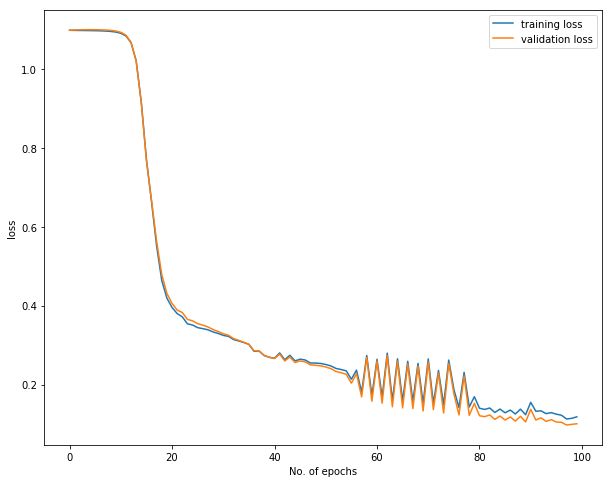

In [3]:
np.random.seed(0)
# Load in the data from disk
path = os.getcwd() + '/data/iris_train.dat'
data = pd.read_csv(path, header=None)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 

# convert from data frames to numpy matrices
X = np.array(X.values)  
y = np.array(y.values)
y = y.flatten()

# load in validation-set
path = os.getcwd() + '/data/iris_test.dat'
data = pd.read_csv(path, header=None) 
cols = data.shape[1]  
X_v = data.iloc[:,0:cols-1]  
y_v = data.iloc[:,cols-1:cols] 

X_v = np.array(X_v.values)  
y_v = np.array(y_v.values)
y_v = y_v.flatten()

# initialize parameters randomly
D = X.shape[1]
K = np.amax(y) + 1

# initialize parameters randomly
h = 6 # size of hidden layer
h2 = 6 # size of hidden layer
W1 = 0.05 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.05 * np.random.randn(h,h2)
b2 = np.zeros((1,h2))
W3 = 0.05 * np.random.randn(h2,K)
b3 = np.zeros((1,K))
theta = (W1,b1,W2,b2,W3,b3)

# some hyperparameters
reg = 1e-3 # regularization strength

nabla_n = computeNumGrad(X,y,theta,reg)
nabla = computeGrad(X,y,theta,reg)
nabla_n = list(nabla_n)
nabla = list(nabla)

for jj in range(0,len(nabla)):
    is_incorrect = 0 # set to false
    grad = nabla[jj]
    grad_n = nabla_n[jj]
    err = np.linalg.norm(grad_n - grad) / (np.linalg.norm(grad_n + grad))
    if(err > 1e-7):
        print("Param {0} is WRONG, error = {1}".format(jj, err))
    else:
        print("Param {0} is CORRECT, error = {1}".format(jj, err))

# re-initialize parameters randomly
h = 100 # size of hidden layer
h2 = 100 # size of hidden layer
W1 = 0.01 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,h2)
b2 = np.zeros((1,h2))
W3 = 0.01 * np.random.randn(h2,K)
b3 = np.zeros((1,K))
theta = (W1,b1,W2,b2,W3,b3)

# some hyperparameters
n_e = 100
n_b = 10
check = 10
step_size = 1e-1 #1e-0
reg = 0 #1e-3 # regularization strength

train_cost = []
valid_cost = []
# gradient descent loop
num_examples = X.shape[0]
for i in xrange(n_e):
    X, y = shuffle(X,y) # re-shuffle the data at epoch start to avoid correlations across mini-batches
    # WRITEME: write your code here to perform a step of gradient descent & record anything else desired for later
    #          you can use the "check" variable to decide when to calculate losses and record/print to screen (as in previous sub-problems)
    train_loss = computeCost(X,y,theta,reg)
    valid_loss = computeCost(X_v,y_v,theta,reg)
    train_cost.append(train_loss)
    valid_cost.append(valid_loss)
    if i % check == 0:
        s = "iteration %d: training loss = %.2f, validation loss = %.2f" % (i, train_loss, valid_loss)
        print (s)
# WRITEME: write the inner training loop here (1 full pass, but via mini-batches instead of using the full batch to estimate the gradient)
    s = 0
    while (s < num_examples):
        # build mini-batch of samples
        X_mb, y_mb = create_mini_batch(X,y,s,s + n_b)
        # WRITEME: gradient calculations and update rules go here
        theta = (W1, b1, W2, b2, W3, b3)
        dW1, db1, dW2, db2, dW3, db3 = computeGrad(X_mb,y_mb,theta,reg)
        W1 = W1 - step_size * dW1
        b1 = b1 - step_size * db1
        W2 = W2 - step_size * dW2
        b2 = b2 - step_size * db2
        W3 = W3 - step_size * dW3
        b3 = b3 - step_size * db3
        
        s += n_b

print(' > Training loop completed!')
# TODO: remove this line below once you have correctly implemented/gradient-checked your various sub-routines
#sys.exit(0) 

scores, probs = predict(X,theta)
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: {0}%'.format(100*np.mean(predicted_class == y)))

scores, probs = predict(X_v,theta)
predicted_class = np.argmax(scores, axis=1)
print('validation accuracy: {0}%'.format(100*np.mean(predicted_class == y_v)))

# NOTE: write your plot generation code here (for example, using the "train_cost" and "valid_cost" list variables)
plt.plot(range(n_e), train_cost, range(n_e), valid_cost)
plt.legend(['training loss', 'validation loss'])
plt.ylabel('loss')
plt.xlabel('No. of epochs')
plt.show()